In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tablet/tablet.csv


Numpy, matplotlib.pyplot, pandas ve seaborn kütüphanelerini çekirdeğe dahil edelim.

In [2]:
import numpy as npm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Veri çerçevesini startups değişkenine atadık. Kopyasını ise df değişkenine atıyoruz.

In [3]:
tablet = pd.read_csv('/kaggle/input/tablet/tablet.csv')
df = tablet.copy()

# Keşifçi Veri Analizi (EDA)

İlk 5 gözlemi görüntüleyelim.

In [4]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Veri çerçevesinin bilgilerini görüntüleyelim.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [6]:
df.shape

(2000, 20)

Eksik verileri kontrol edelim.

In [7]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Veri setindeki hedef değişkeninin dengeli dağılıp dağılmadığını inceleylim.

In [8]:
df['FiyatAraligi'].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

Veri çerçevesindeki istatistiksel verileri inceleyelim.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [10]:
df['Renk'].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [11]:
df['Renk'].nunique()

12

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

array([[<Axes: title={'center': 'BataryaGucu'}>,
        <Axes: title={'center': 'MikroislemciHizi'}>,
        <Axes: title={'center': 'OnKameraMP'}>],
       [<Axes: title={'center': 'DahiliBellek'}>,
        <Axes: title={'center': 'Kalinlik'}>,
        <Axes: title={'center': 'Agirlik'}>],
       [<Axes: title={'center': 'CekirdekSayisi'}>,
        <Axes: title={'center': 'ArkaKameraMP'}>,
        <Axes: title={'center': 'CozunurlukYükseklik'}>],
       [<Axes: title={'center': 'CozunurlukGenislik'}>,
        <Axes: title={'center': 'RAM'}>,
        <Axes: title={'center': 'BataryaOmru'}>]], dtype=object)

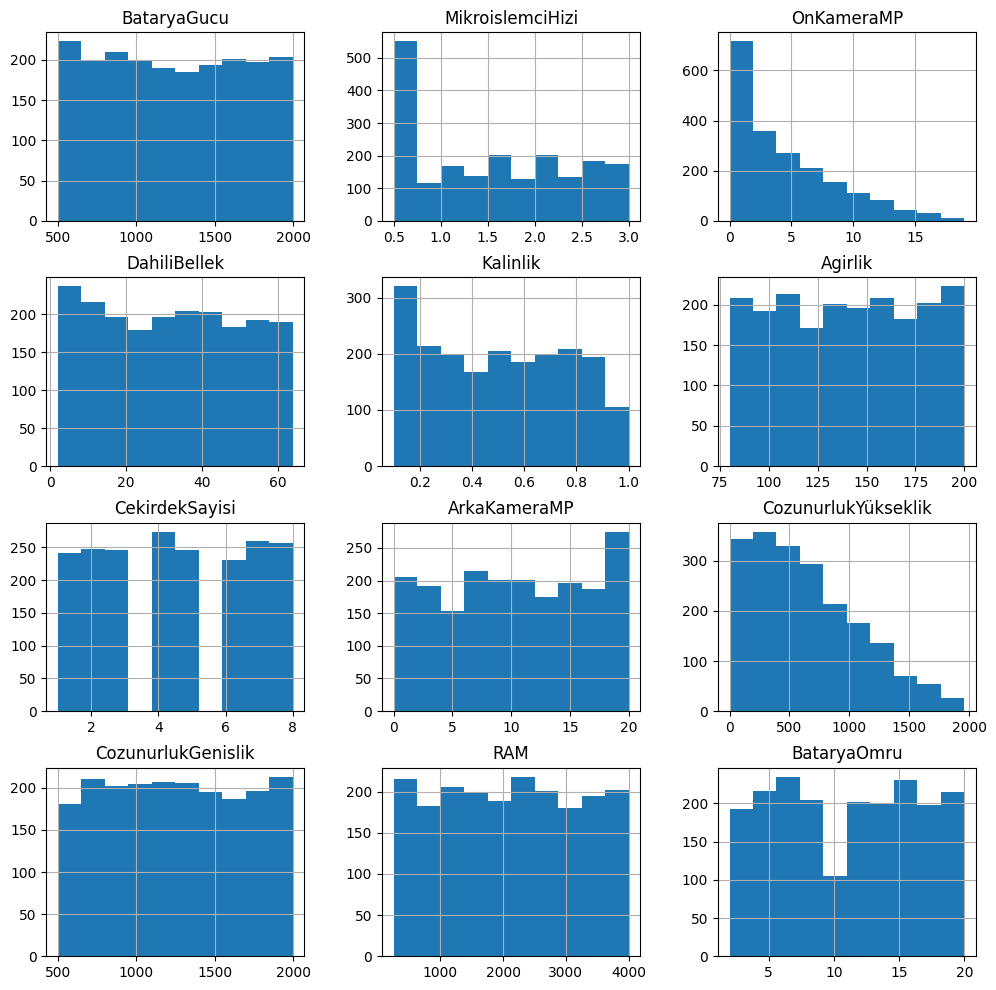

In [12]:
df.hist(figsize=(12,12))

In [13]:
# Sayısal sütunları aldık
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

<Axes: >

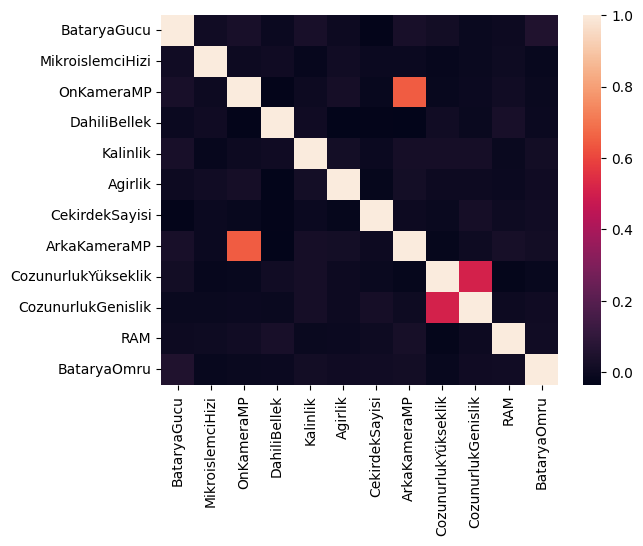

In [14]:
sns.heatmap(correlation_matrix,
            xticklabels = correlation_matrix.columns.values,
            yticklabels = correlation_matrix.columns.values)

Anlamlı görülen değişkenler arasındaki korelasyon katsayısı

In [15]:
df[numerical_columns].corr()['ArkaKameraMP']['OnKameraMP']

0.6456968663318242

In [16]:
df[numerical_columns].corr()["CozunurlukGenislik"]["CozunurlukYükseklik"]

0.5106644191393149

"FiyatAraligi" özniteliğinin dengeli dağılıp dağılmadığına bakılması

In [17]:
df["FiyatAraligi"].value_counts()

FiyatAraligi
Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: count, dtype: int64

<Axes: xlabel='FiyatAraligi', ylabel='count'>

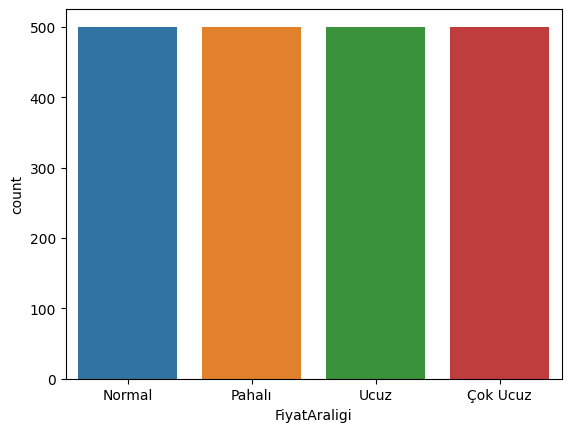

In [18]:
sns.countplot(x="FiyatAraligi", data=df)

Hedef değişkeni ve sayısal öznitelikler arasındaki ilişki.

In [19]:
# Metinsel olmayan sütunları seçme
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Fiyat aralığına göre gruplama ve ortalama alma
mean_by_price_range = df.groupby("FiyatAraligi")[numerical_columns].mean().T

mean_by_price_range

FiyatAraligi,Normal,Pahalı,Ucuz,Çok Ucuz
BataryaGucu,1228.3200,1379.98400,1228.8680,1116.902000
MikroislemciHizi,1.5298,1.52040,1.4886,1.550200
OnKameraMP,4.4980,4.31600,4.3400,4.092929
DahiliBellek,30.9200,33.97600,32.1160,31.174000
Kalinlik,0.4908,0.50200,0.5240,0.490200
Agirlik,143.6140,136.32000,140.5100,140.552000
CekirdekSayisi,4.6820,4.50200,4.2980,4.600000
ArkaKameraMP,10.0180,10.15000,9.9240,9.574000
CozunurlukYükseklik,632.2840,744.84800,666.8920,536.408000
CozunurlukGenislik,1234.0460,1369.83800,1251.9080,1150.270000


"RAM" ile diğer bazı öznitelikler arasında ilişkisel görselleştirme yapalım.

<Axes: xlabel='RAM', ylabel='CozunurlukYükseklik'>

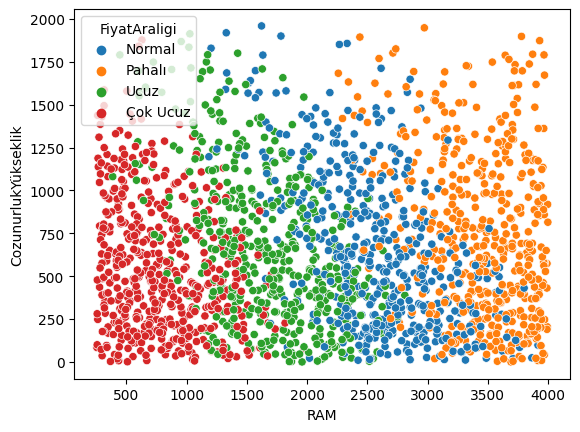

In [20]:
sns.scatterplot(x="RAM", y="CozunurlukYükseklik", hue="FiyatAraligi", data=df)

"CozunurlukYükseklik" ile "CozunurlukGenislik" arasında ilişkisel görselleştirme yapılması

<Axes: xlabel='CozunurlukYükseklik', ylabel='CozunurlukGenislik'>

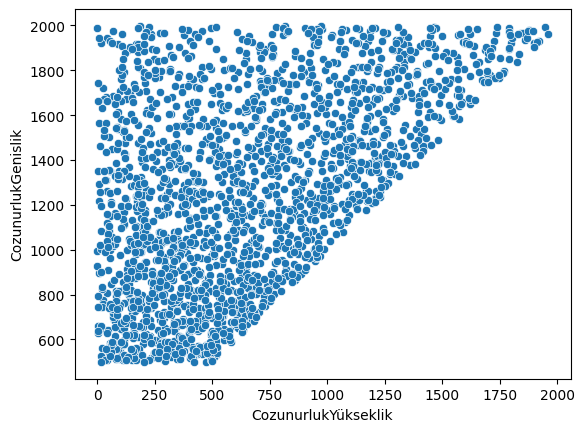

In [21]:
sns.scatterplot(x="CozunurlukYükseklik", y="CozunurlukGenislik", data=df)

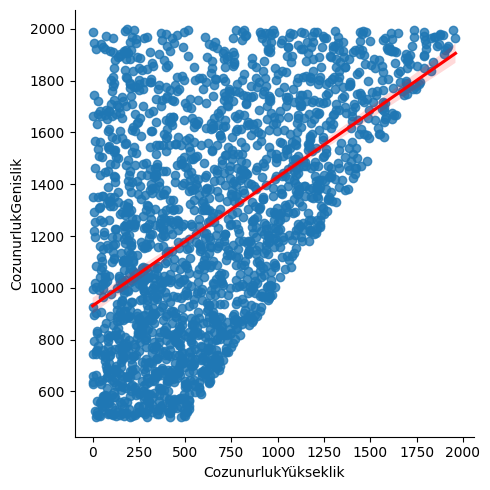

In [22]:
sns.lmplot(x="CozunurlukYükseklik", y="CozunurlukGenislik", data=df, line_kws={'color':'red'})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

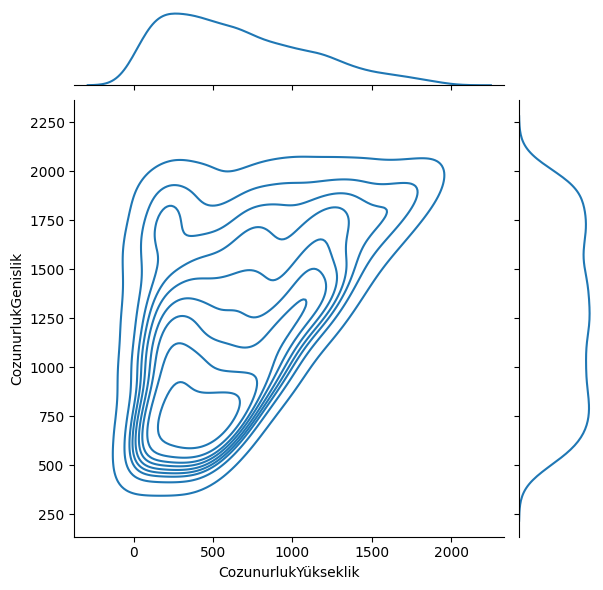

In [23]:
sns.jointplot(x=df["CozunurlukYükseklik"], y=df["CozunurlukGenislik"], kind='kde')

OnKamerMP ile ArkaKameraMP öznitelikleri arasında ilişkilsel görselleştirme yapılması

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


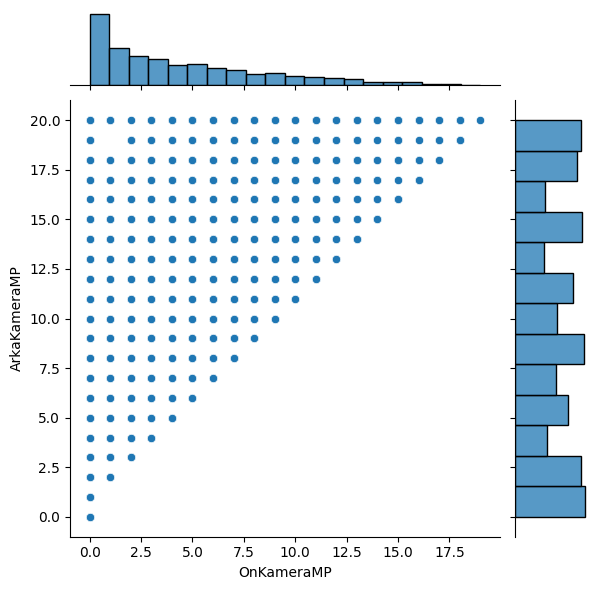

In [24]:
sns.jointplot(x="OnKameraMP", y="ArkaKameraMP", data=df)

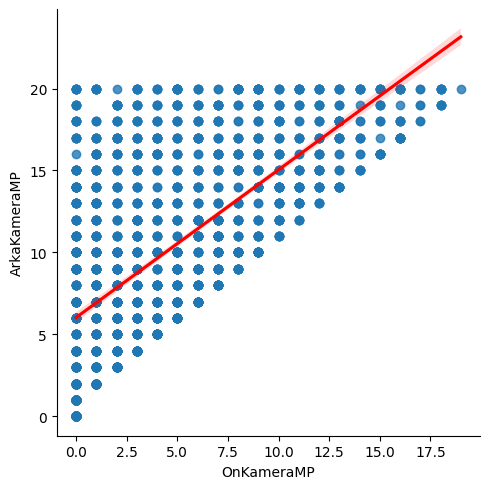

In [25]:
sns.lmplot(x="OnKameraMP", y="ArkaKameraMP", data=df, line_kws={'color':'red'})

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

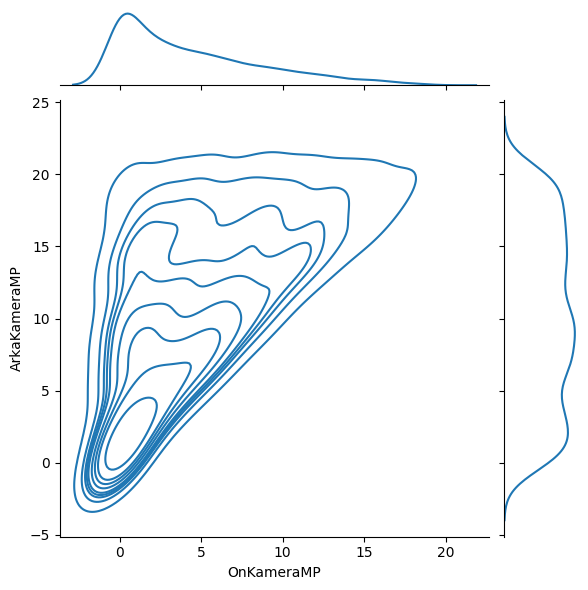

In [26]:
sns.jointplot(x=df["OnKameraMP"], y=df["ArkaKameraMP"], kind='kde')

Diğer özniteliklerle ilişkisel görselleştirme yapılması

/tmp/ipykernel_18/1876477844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MikroislemciHizi"], bins=20)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MikroislemciHizi', ylabel='Density'>

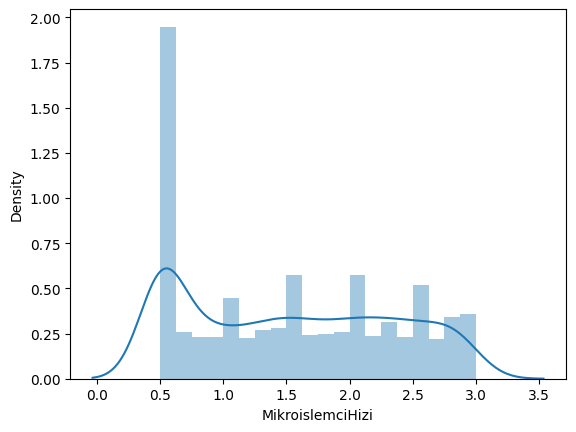

In [27]:
sns.distplot(df["MikroislemciHizi"], bins=20)

<Axes: xlabel='FiyatAraligi', ylabel='BataryaGucu'>

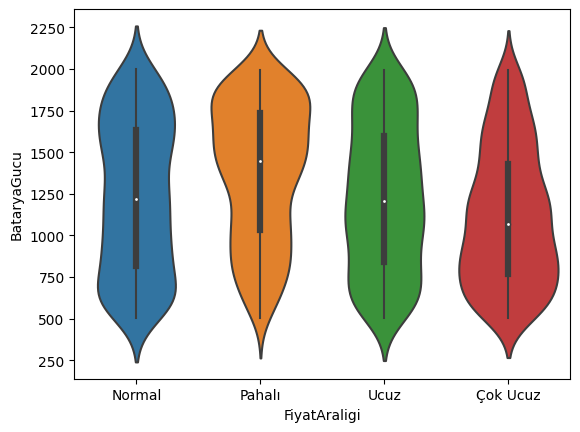

In [28]:
sns.violinplot(x="FiyatAraligi", y="BataryaGucu", data=df)

<Axes: xlabel='Renk', ylabel='count'>

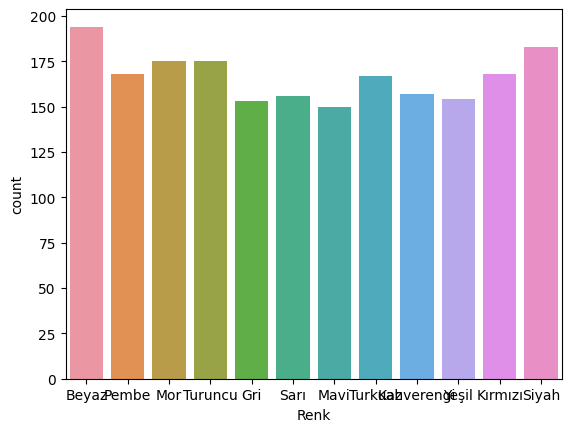

In [29]:
sns.countplot(x="Renk", data=df)

# Eksik Verilerin Tespit Edilmesi

In [30]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [31]:
df.isnull().sum().sum()

17

<Axes: >

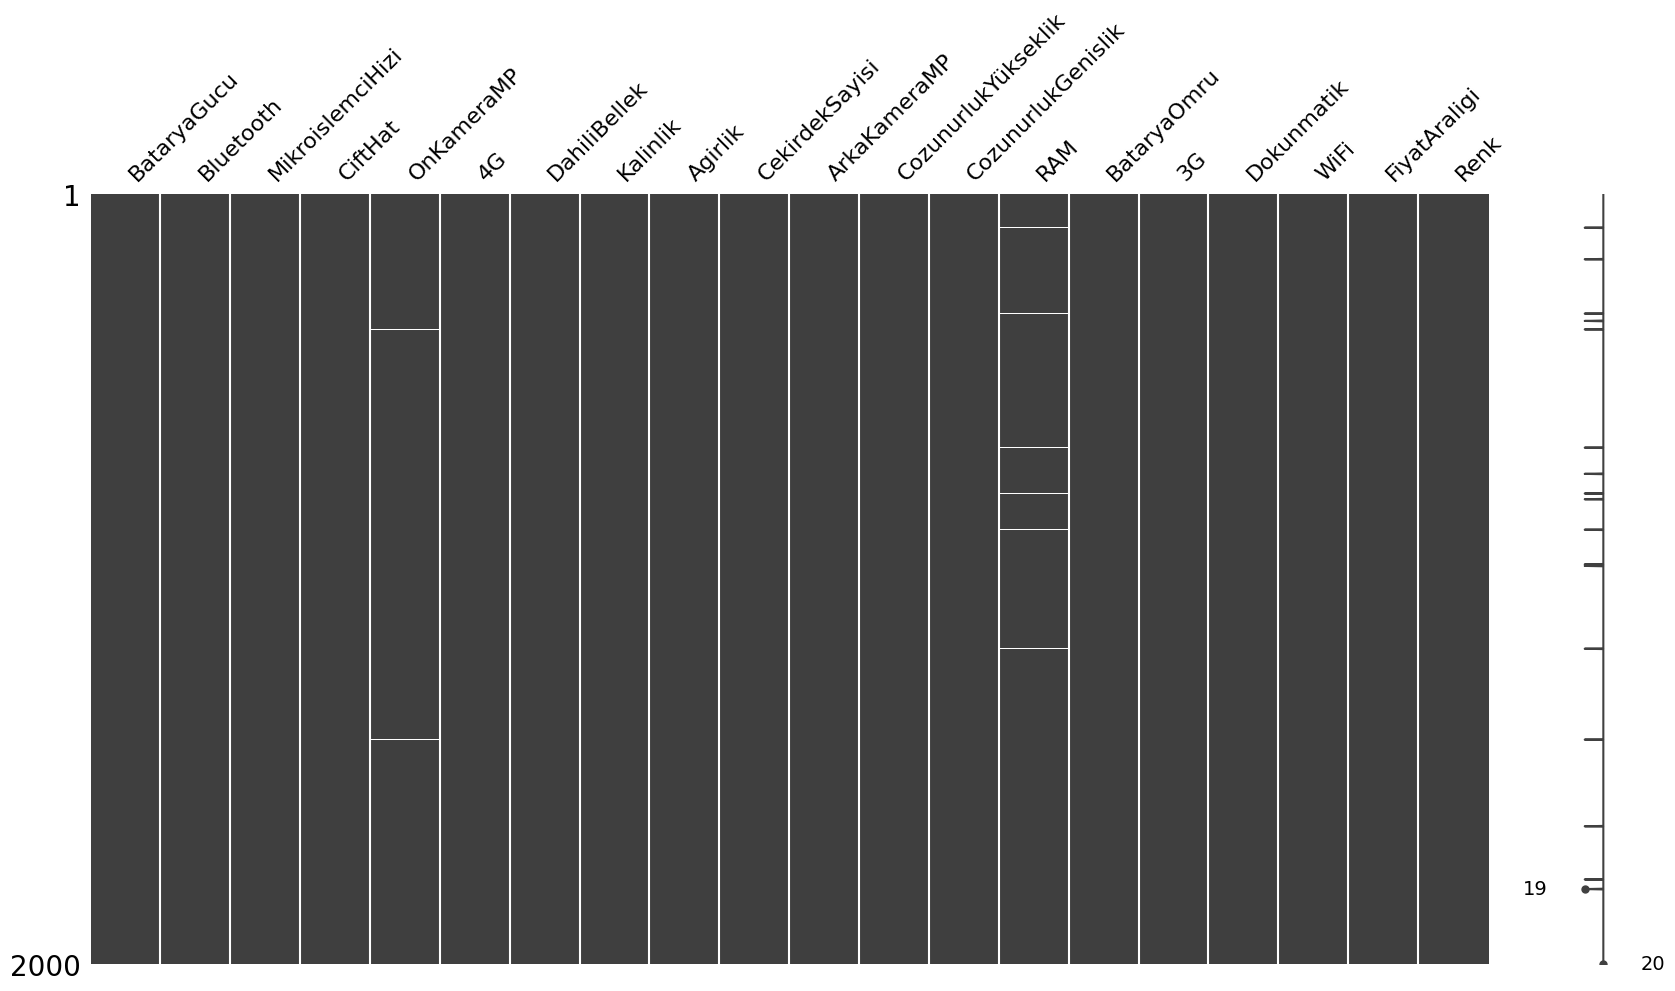

In [32]:
import missingno
missingno.matrix(df, figsize=(20,10))

<Axes: >

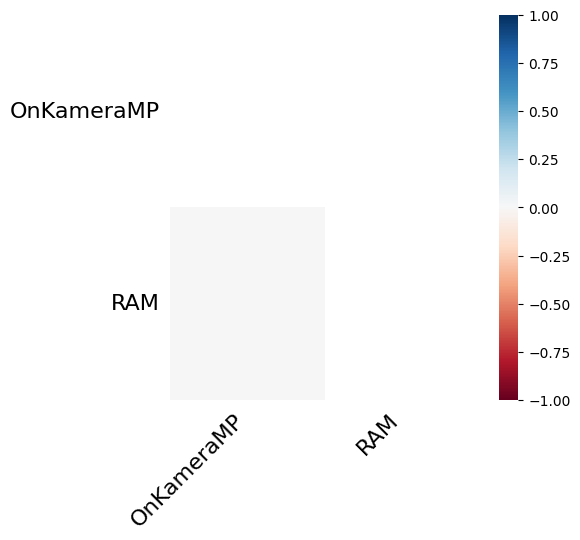

In [33]:
missingno.heatmap(df, figsize=(5,5)) # eksik veriler arasında ilişki yok

"OnKameraMP" için eksik verileri doldurma

In [34]:
df[df['OnKameraMP'].isnull()].T

,351,726,792,1416,1641
BataryaGucu,726,1296,504,1617,763
Bluetooth,Yok,Yok,Yok,Var,Yok
MikroislemciHizi,2.2,0.9,2.8,2.4,1.7
CiftHat,Yok,Var,Var,Yok,Var
OnKameraMP,NaN,NaN,NaN,NaN,NaN
4G,Var,Var,Yok,Var,Var
DahiliBellek,40,14,40,36,2
Kalinlik,0.8,0.5,0.5,0.8,0.5
Agirlik,94,124,178,85,92
CekirdekSayisi,4,5,3,1,8


Fiyatı çok ucuz olanların, ön kamerasının ortalaması

In [35]:
df[(df["FiyatAraligi"]=="Çok Ucuz")]["OnKameraMP"].mean()

4.092929292929293

In [36]:
on_kamera_eksikveriler=df[(df["FiyatAraligi"]=="Çok Ucuz")& (df["OnKameraMP"].isnull())].index
print(on_kamera_eksikveriler)

Index([351, 726, 792, 1416, 1641], dtype='int64')


loc satır ve sutunlara ait değerlerde seçim yapar


In [37]:
df.loc[on_kamera_eksikveriler,"OnKameraMP"]=4

In [38]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              0
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

RAM ÖZNİTELİĞİ İÇİN EKSİK VERİLERİ DOLDURMA


In [39]:
df[df["RAM"].isnull()].T

,87,169,310,329,658,777,871,961,965,1180,1779,1804
BataryaGucu,1062,1944,1479,1035,732,753,1035,1949,1786,1369,1701,1370
Bluetooth,Var,Var,Var,Yok,Var,Var,Var,Yok,Yok,Var,Var,Yok
MikroislemciHizi,2.5,1.8,1.8,0.6,1.3,0.5,2.7,1.3,1.2,1.8,0.5,1.4
CiftHat,Var,Var,Var,Var,Yok,Yok,Yok,Var,Yok,Var,Yok,Yok
OnKameraMP,6.0,0.0,0.0,2.0,5.0,11.0,1.0,0.0,11.0,6.0,13.0,5.0
4G,Yok,Var,Var,Var,Var,Var,Yok,Yok,Yok,Yok,Var,Var
DahiliBellek,10,31,24,44,32,48,40,23,61,34,46,6
Kalinlik,0.9,0.8,0.1,0.5,0.4,0.1,0.2,0.1,0.1,0.5,0.9,0.2
Agirlik,160,87,146,99,163,121,157,101,123,162,115,158
CekirdekSayisi,1,4,6,3,8,8,5,5,3,1,2,6


In [40]:
df[df['RAM'].isnull()]['FiyatAraligi'] #eksik verilerin ortak özelliği pahalı etiketli olması

87      Pahalı
169     Pahalı
310     Pahalı
329     Pahalı
658     Pahalı
777     Pahalı
871     Pahalı
961     Pahalı
965     Pahalı
1180    Pahalı
1779    Pahalı
1804    Pahalı
Name: FiyatAraligi, dtype: object

In [41]:
df[(df["FiyatAraligi"]=="Pahalı")]["RAM"].mean()  #fiyatı pahalı olanaların ram ortalaması

3449.3504098360654

In [42]:
ram_eksikveriler=df[(df["FiyatAraligi"]=="Pahalı")&(df["RAM"].isnull())].index
ram_eksikveriler

Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [43]:
df.loc[ram_eksikveriler, "RAM"] = 3450

In [44]:
df.isnull().sum()

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

KATEGORİK DEĞİŞKENLERİN SAYISALLAŞTIRILMASI

1-Label Encoder İşlemi

In [45]:
df["Bluetooth"].unique()

array(['Yok', 'Var'], dtype=object)

In [46]:
df["CiftHat"].unique()

array(['Yok', 'Var'], dtype=object)

In [47]:
df["4G"].unique()

array(['Yok', 'Var'], dtype=object)

In [48]:
df["3G"].unique()

array(['Var', 'Yok'], dtype=object)

In [49]:
df["Dokunmatik"].unique()

array(['Yok', 'Var'], dtype=object)

In [50]:
df["WiFi"].unique()

array(['Yok', 'Var'], dtype=object)

In [51]:
df["Bluetooth"]=df.Bluetooth.map({"Var":1,"Yok":0})
df["CiftHat"]=df.CiftHat.map({"Var":1,"Yok":0})
df["4G"]=df["4G"].map({"Var":1,"Yok":0})
df["3G"]=df["4G"].map({"Var":1,"Yok":0})
df["Dokunmatik"]=df.Dokunmatik.map({"Var":1,"Yok":0})
df["WiFi"]=df.WiFi.map({"Var":1,"Yok":0})


In [52]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,10,499,695,2328.0,2,NaN,0,0,Normal,Beyaz
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,0,259,1040,3863.0,9,NaN,1,1,Pahalı,Pembe
2,843,0,1.3,1,1.0,0,16,0.9,119,7,4,593,732,1734.0,14,NaN,0,1,Ucuz,Mor
3,894,0,0.5,1,1.0,1,50,0.5,199,3,14,1285,1462,3615.0,6,NaN,0,1,Pahalı,Turuncu
4,936,0,1.0,0,1.0,0,18,0.2,153,3,18,1330,1686,2391.0,3,NaN,1,1,Normal,Beyaz


2-One Hot Encoder İşlemi

In [53]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [54]:
df["Renk"].nunique()

12

In [55]:
df['Renk']=pd.Categorical(df['Renk'])
dfDummies=pd.get_dummies(df['Renk'],prefix='Renk')
dfDummies.head()

,Renk_Beyaz,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,False,False


In [56]:
df=pd.concat([df,dfDummies],axis=1)
df.drop(['Renk'],axis=1,inplace=True)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu,Renk_Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,False,False,False,False,False,False,False,False,False,False
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,False,False,False,False,True,False,False,False,False,False
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,False,False,False,True,False,False,False,False,False,False
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,False,False,False,False,False,False,False,False,True,False
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,False,False,False,False,False,False,False,False,False,False


3.SAFHA

# GaussianNB Modeli

In [57]:
y=df["FiyatAraligi"]#bagimli degisken
x=df.drop(["FiyatAraligi"],axis=1)#bagimsiz degisken

In [58]:
y

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

In [59]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
BataryaGucu,1325,1046,843,894,936,1162,1849,1860,1536,539,...,713,1958,598,1180,1697,689,1654,742,704,1872
Bluetooth,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
MikroislemciHizi,1.9,2.8,1.3,0.5,1.0,1.0,0.5,0.5,0.8,0.6,...,0.9,0.5,2.3,1.2,0.7,2.9,1.8,2.2,2.2,0.5
CiftHat,0,1,1,1,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0
OnKameraMP,2.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,12.0,9.0,...,0.0,6.0,7.0,5.0,1.0,3.0,1.0,4.0,4.0,5.0
4G,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,1,1,0,0,0,1
DahiliBellek,50,58,16,50,18,50,29,55,13,21,...,42,52,21,50,34,7,11,56,53,26
Kalinlik,0.1,0.2,0.9,0.5,0.2,0.5,0.5,0.7,0.3,0.1,...,0.1,0.4,0.7,1.0,0.1,0.8,0.3,0.2,0.2,0.5
Agirlik,146,100,119,199,153,104,181,83,105,145,...,94,153,196,144,95,147,146,190,186,172
CekirdekSayisi,1,8,7,3,3,4,7,6,7,7,...,1,1,2,4,1,2,7,7,6,4


In [60]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=0)

In [61]:
x_train.T

,1452,1044,1279,674,1200,1901,393,217,1704,1713,...,1747,1033,1383,1731,763,835,1216,1653,559,684
BataryaGucu,1883,1961,1701,771,568,1027,1269,1444,1715,1496,...,574,1995,516,1723,1413,1454,1707,906,1836,832
Bluetooth,1,1,1,0,0,1,1,1,0,1,...,1,1,0,1,0,0,0,0,0,0
MikroislemciHizi,2.7,1.5,1.6,2.9,2.0,0.8,1.3,2.1,1.9,2.0,...,2.0,1.9,1.1,1.0,0.5,1.4,1.4,2.1,1.1,1.6
CiftHat,1,0,1,0,0,0,0,1,0,1,...,1,0,1,0,1,1,0,1,1,1
OnKameraMP,6.0,10.0,3.0,2.0,1.0,7.0,14.0,0.0,4.0,4.0,...,0.0,6.0,0.0,1.0,5.0,8.0,0.0,7.0,0.0,1.0
4G,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,1
DahiliBellek,30,55,10,62,36,18,52,6,3,42,...,26,9,39,7,51,37,41,18,14,34
Kalinlik,0.5,0.5,0.3,0.7,0.3,1.0,0.8,0.9,0.1,0.5,...,0.5,0.8,0.4,0.6,0.3,0.8,0.8,0.1,0.7,0.3
Agirlik,95,100,194,106,179,146,118,103,171,182,...,118,139,91,126,117,80,80,136,104,108
CekirdekSayisi,2,7,8,1,3,7,2,1,5,5,...,6,6,5,3,5,8,7,2,5,5


In [62]:
x_test.T

,405,1190,1132,731,1754,1178,1533,1303,1857,18,...,141,1644,1256,202,933,575,982,723,1487,801
BataryaGucu,1367,1552,1483,1136,1077,790,972,1462,1469,558,...,1281,1126,1617,862,1413,875,1588,1969,601,561
Bluetooth,0,0,0,0,0,0,1,1,0,1,...,1,0,1,1,0,1,1,0,1,1
MikroislemciHizi,2.9,1.2,2.1,0.5,2.5,0.5,1.3,1.7,1.7,2.8,...,2.3,0.7,1.3,0.8,0.6,0.7,2.5,0.8,1.7,1.0
CiftHat,0,0,0,0,1,1,0,1,1,0,...,1,0,1,1,0,1,0,1,1,0
OnKameraMP,4.0,10.0,1.0,0.0,0.0,7.0,8.0,1.0,11.0,1.0,...,0.0,3.0,3.0,3.0,0.0,1.0,12.0,5.0,3.0,0.0
4G,0,1,1,1,1,1,0,0,1,1,...,0,0,1,0,1,0,1,1,1,0
DahiliBellek,56,53,54,9,45,44,44,25,44,49,...,28,49,30,23,13,30,4,7,6,11
Kalinlik,0.8,0.3,0.2,0.9,1.0,0.1,0.7,0.2,0.5,0.8,...,0.3,0.9,0.7,0.4,0.1,0.7,0.3,0.2,0.8,0.1
Agirlik,176,180,176,150,174,89,82,182,169,142,...,148,165,105,165,128,146,148,85,169,163
CekirdekSayisi,2,8,7,6,3,8,7,7,2,5,...,1,8,2,2,1,8,5,8,4,8


In [63]:
y_train.T

1452      Pahalı
1044      Pahalı
1279      Normal
674         Ucuz
1200    Çok Ucuz
          ...   
835         Ucuz
1216      Normal
1653      Pahalı
559       Normal
684     Çok Ucuz
Name: FiyatAraligi, Length: 1700, dtype: object

In [64]:
y_test.T

405     Çok Ucuz
1190      Normal
1132        Ucuz
731       Normal
1754        Ucuz
          ...   
575     Çok Ucuz
982       Normal
723     Çok Ucuz
1487      Normal
801       Normal
Name: FiyatAraligi, Length: 300, dtype: object

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# NaN değerlerini ortalama ile doldurma
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Gaussian Naive Bayes modelini oluştur ve eğit
nb = GaussianNB()
nb_model = nb.fit(x_imputed, y)


In [66]:
nb_model

GaussianNB()

In [67]:
# Eğitilmiş modeli kullanarak tahmin yap
y_pred = nb_model.predict(x_imputed)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)#doğruluk skoru

0.7745

In [69]:
from sklearn.metrics import confusion_matrix
karmasiklik_matrisi=confusion_matrix(y,y_pred)#bagimli degiskenin ne kadar dogru sonuc verdigini gosterir
karmasiklik_matrisi

array([[336,  72,  92,   0],
       [ 75, 422,   3,   0],
       [ 92,   0, 352,  56],
       [  1,   0,  60, 439]])

In [70]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

# NaN değerlerini ortalama ile doldurma
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# cross_val_score kullanarak model performansını değerlendirme
scores = cross_val_score(nb_model, x_imputed, y, cv=20)
print("Cross Validation Scores:", scores)


Cross Validation Scores: [0.76 0.81 0.76 0.72 0.82 0.78 0.7  0.72 0.71 0.68 0.71 0.74 0.8  0.76
 0.7  0.71 0.73 0.77 0.77 0.77]


In [72]:
cross_val_score(nb_model,x_imputed,y,cv=20).mean()

0.7459999999999999

In [73]:
from sklearn.metrics import precision_score
PrecisionScore=precision_score(y,y_pred,average='weighted')
PrecisionScore

0.7755166111441414

In [74]:
from sklearn.metrics import recall_score
RecallScore=recall_score(y,y_pred,average='weighted')
RecallScore

0.7745

In [75]:
from sklearn.metrics import f1_score
F1Score=f1_score(y,y_pred,average='weighted')
F1Score

0.7749838982689586

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

      Normal       0.67      0.67      0.67       500
      Pahalı       0.85      0.84      0.85       500
        Ucuz       0.69      0.70      0.70       500
    Çok Ucuz       0.89      0.88      0.88       500

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



# Desicion Tree Modeli

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [78]:
# 5. NaN değerlerini doldurmak için
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [79]:
dt = DecisionTreeClassifier(random_state=0, criterion='gini')
dt_model = dt.fit(x_train,y_train)

In [80]:
dt_model

DecisionTreeClassifier(random_state=0)

In [81]:
y_pred = dt_model.predict(x_test) #daha önce test edilmemiş x_test verileri için tahmin ürettik

In [82]:
accuracy_score(y_test,y_pred) #model doğruluğunu hesapladık

0.8366666666666667

In [83]:
karmasiklik_matrisi = confusion_matrix(y_test,y_pred)
print(karmasiklik_matrisi)

[[56 10  9  0]
 [12 67  0  0]
 [ 4  0 50 11]
 [ 0  0  3 78]]


In [84]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [85]:
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)
cross_val_score(nb_model,x,y,cv=20) #20 katmana bölerek her katmanda modelin performansını ölçeriz

array([0.76, 0.81, 0.76, 0.72, 0.82, 0.78, 0.7 , 0.72, 0.71, 0.68, 0.71,
       0.74, 0.8 , 0.76, 0.7 , 0.71, 0.73, 0.77, 0.77, 0.77])

In [86]:
cross_val_score(dt_model,x, y, cv=20).mean() #ortalama artmış

0.834

In [87]:
PrecisionScore = precision_score(y_test ,y_pred, average="weighted")
PrecisionScore #gerçek ve tahmin edilen veriler arasındaki kesinlik skorunu hesapladık

0.8349390398574885

In [88]:
RecallScore = recall_score(y_test ,y_pred, average="weighted")
RecallScore #duyarlılık skorunu hesaplar

0.8366666666666667

In [89]:
F1Score = f1_score(y_test ,y_pred, average="weighted")
F1Score #yukarıdakilerin harmonik ortalaması ile oluşsan skor

0.835041152095807

In [90]:
print(classification_report(y_test,y_pred)) #genel bir tabloda görüntüleme

              precision    recall  f1-score   support

      Normal       0.78      0.75      0.76        75
      Pahalı       0.87      0.85      0.86        79
        Ucuz       0.81      0.77      0.79        65
    Çok Ucuz       0.88      0.96      0.92        81

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.84      0.84       300



# KNN modeli

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #en yakın komşu sınıflandırıcı #varsayılan k değeri 5
knn_model = knn.fit(x_train,y_train)

In [92]:
from sklearn.model_selection import GridSearchCV
# Parametre grid'i oluştur
param_grid = {'n_neighbors': range(1, 21)}  # K değerleri 1'den 20'ye kadar

# GridSearchCV oluştur
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Veri setini kullanarak en iyi K değerini bul
grid_search.fit(x_train, y_train)

# En iyi K değerini yazdır
print("En iyi K değeri:", grid_search.best_params_['n_neighbors'])


En iyi K değeri: 7


In [93]:
knn_model

KNeighborsClassifier()

In [94]:
y_pred = knn_model.predict(x)

In [95]:
accuracy_score(y,y_pred)

0.948

In [96]:
karmasiklik_matrisii = confusion_matrix(y,y_pred)
print(karmasiklik_matrisii)

[[457  17  26   0]
 [ 27 473   0   0]
 [  9   0 477  14]
 [  0   0  11 489]]


In [97]:
cross_val_score(knn_model,x,y,cv=20)

array([0.91, 0.92, 0.94, 0.92, 0.9 , 0.94, 0.85, 0.93, 0.91, 0.92, 0.93,
       0.92, 0.92, 0.9 , 0.9 , 0.93, 0.93, 0.94, 0.94, 0.97])

In [98]:
cross_val_score(knn_model,x,y,cv=20).mean()

0.921

In [99]:
PrecisionScore = precision_score(y ,y_pred, average="weighted")
PrecisionScore

0.9481165930725044

In [100]:
RecallScore = recall_score(y,y_pred, average="weighted")
RecallScore

0.948

In [101]:
F1Score = f1_score(y ,y_pred, average="weighted")
F1Score 

0.9479754588268462

In [102]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

      Normal       0.93      0.91      0.92       500
      Pahalı       0.97      0.95      0.96       500
        Ucuz       0.93      0.95      0.94       500
    Çok Ucuz       0.97      0.98      0.98       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# Ekip lideri notu

In [103]:
dt = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt_model = dt.fit(x_train, y_train)  # train verilerini fit ettik
y_pred = dt_model.predict(x_test)


In [104]:
accuracy_score(y_test,y_pred)

0.8266666666666667

In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Normal       0.76      0.81      0.79        75
      Pahalı       0.87      0.84      0.85        79
        Ucuz       0.81      0.72      0.76        65
    Çok Ucuz       0.86      0.91      0.89        81

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300



KNN modelinde komşu sayı 2'den 50 e kadar arttır ve sonuçları göster.

In [106]:
k_degerleri=[]

for i in range(2,51):
    k=KNeighborsClassifier(i)
    knn_model=k.fit(x_train,y_train)
    y_pred=knn_model.predict(x)
    accuracy_s=accuracy_score(y,y_pred)
    k_degerleri.append(accuracy_s)

Text(0, 0.5, 'Accuracy Score')

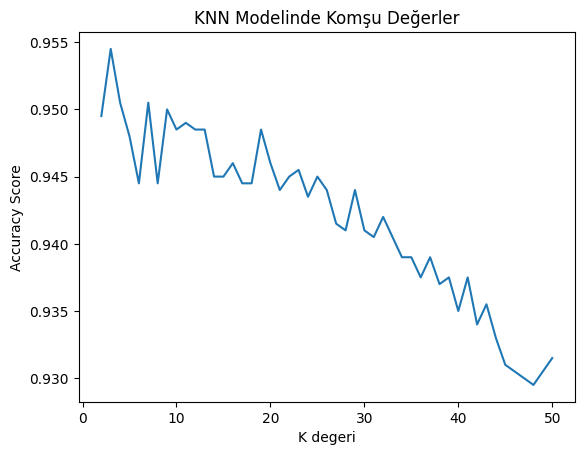

In [107]:
plt.plot(range(2,51),k_degerleri)
plt.title('KNN Modelinde Komşu Değerler')
plt.xlabel('K degeri')
plt.ylabel('Accuracy Score')